In [5]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

#ResNet-34

In [0]:
class ResidualUnit(keras.layers.Layer):
  def __init__(self,filters,strides=1,activation="relu",**kwargs):
    super().__init__(**kwargs)
    self.activation = keras.activations.get(activation)
    self.main_layers = [
                        keras.layers.Conv2D(filters,3,strides=strides,padding='SAME',use_bias=False),
                        keras.layers.BatchNormalization(),
                        self.activation,
                        keras.layers.Conv2D(filters,3,strides=strides,padding='SAME',use_bias=False),
                        keras.layers.BatchNormalization()
    ]
    self.skip_layers = []
    if strides > 1:
      self.skip_layers = [
                          keras.layers.Conv2D(filters,1,strides=strides,padding='SAME',use_bias=False),
                          keras.layers.BatchNormalization()
      ]
    
    def call(self,inputs):
      Z = inputs
      for layer in self.main_layers:
        Z = layer(Z)
      skip_Z = inputs
      for layer in self.skip_layers:
        skip_Z = layer(skip_Z)
      return self.activation(Z+skip_Z)

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64,7,strides=2,padding="SAME",use_bias=False,input_shape=[224,224,3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3,strides=2,padding="SAME"))
prev_filters = 64
for filters in [64]*3 + [128]*4 + [256]*6 + [512]*3:
  strides = 1 if filters == prev_filters else 2
  model.add(ResidualUnit(filters,strides=strides))
  prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10,activation="softmax"))

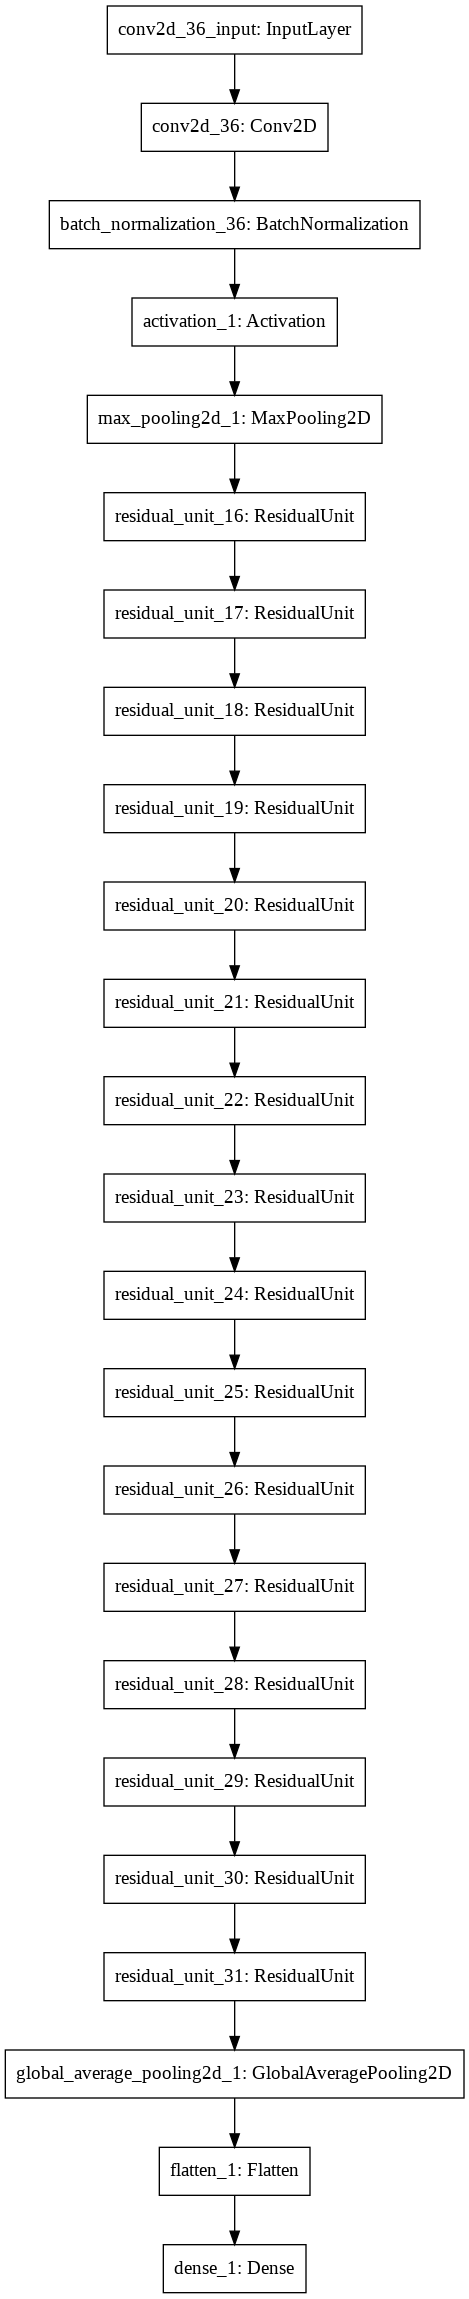

In [9]:
keras.utils.plot_model(model)